# Transforamtion des données 

transformation des données suivant nos décision .... bla bla bla bla bla bla bla bla

## Chargement des données

In [24]:
import os
import pandas as pd

DATA_ROOT = "./Data/"
# load data with path file on a dataframe 
def load_data(file_name:str,data_folder_path=DATA_ROOT):
    data_path = os.path.join(data_folder_path, file_name)
    if not os.path.isfile(data_path):
        print("error file not found :",data_path)
        df= pd.DataFrame()
    else :
        df = pd.read_csv(data_path)
    return df

In [25]:
data_merge = load_data("DataMerge.csv")
data_merge = data_merge.drop("Unnamed: 0",axis=1)
data_merge.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
0,3.0,4.0,2.0,0,Travel_Rarely,Sales,6,2,Life Sciences,1,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,3.0,2.0,4.0,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,...,23,1,6.0,3,5,1,4,2,4,7.718969
2,2.0,2.0,1.0,0,Travel_Frequently,Research & Development,17,4,Other,4,...,15,3,5.0,2,5,0,3,3,3,7.013240
3,4.0,4.0,3.0,0,Non-Travel,Research & Development,2,5,Life Sciences,3,...,11,3,13.0,5,8,7,5,2,3,7.193678
4,4.0,1.0,3.0,0,Travel_Rarely,Research & Development,10,1,Medical,1,...,12,2,9.0,2,6,0,4,3,3,8.006175


In [27]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  4385 non-null   float64
 1   JobSatisfaction          4390 non-null   float64
 2   WorkLifeBalance          4372 non-null   float64
 3   Attrition                4410 non-null   int64  
 4   BusinessTravel           4410 non-null   object 
 5   Department               4410 non-null   object 
 6   DistanceFromHome         4410 non-null   int64  
 7   Education                4410 non-null   int64  
 8   EducationField           4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

## étude des données
stats

Pour les stats nous sup les Nan et valeurs non numérique

In [42]:
data_stats = data_merge.copy()
#Drop rows with Nan
data_stats.dropna(inplace=True)
colToDel = ["MaritalStatus", "JobRole", "Department","BusinessTravel","EducationField"]
data_stats = data_stats.drop(colToDel, axis=1)


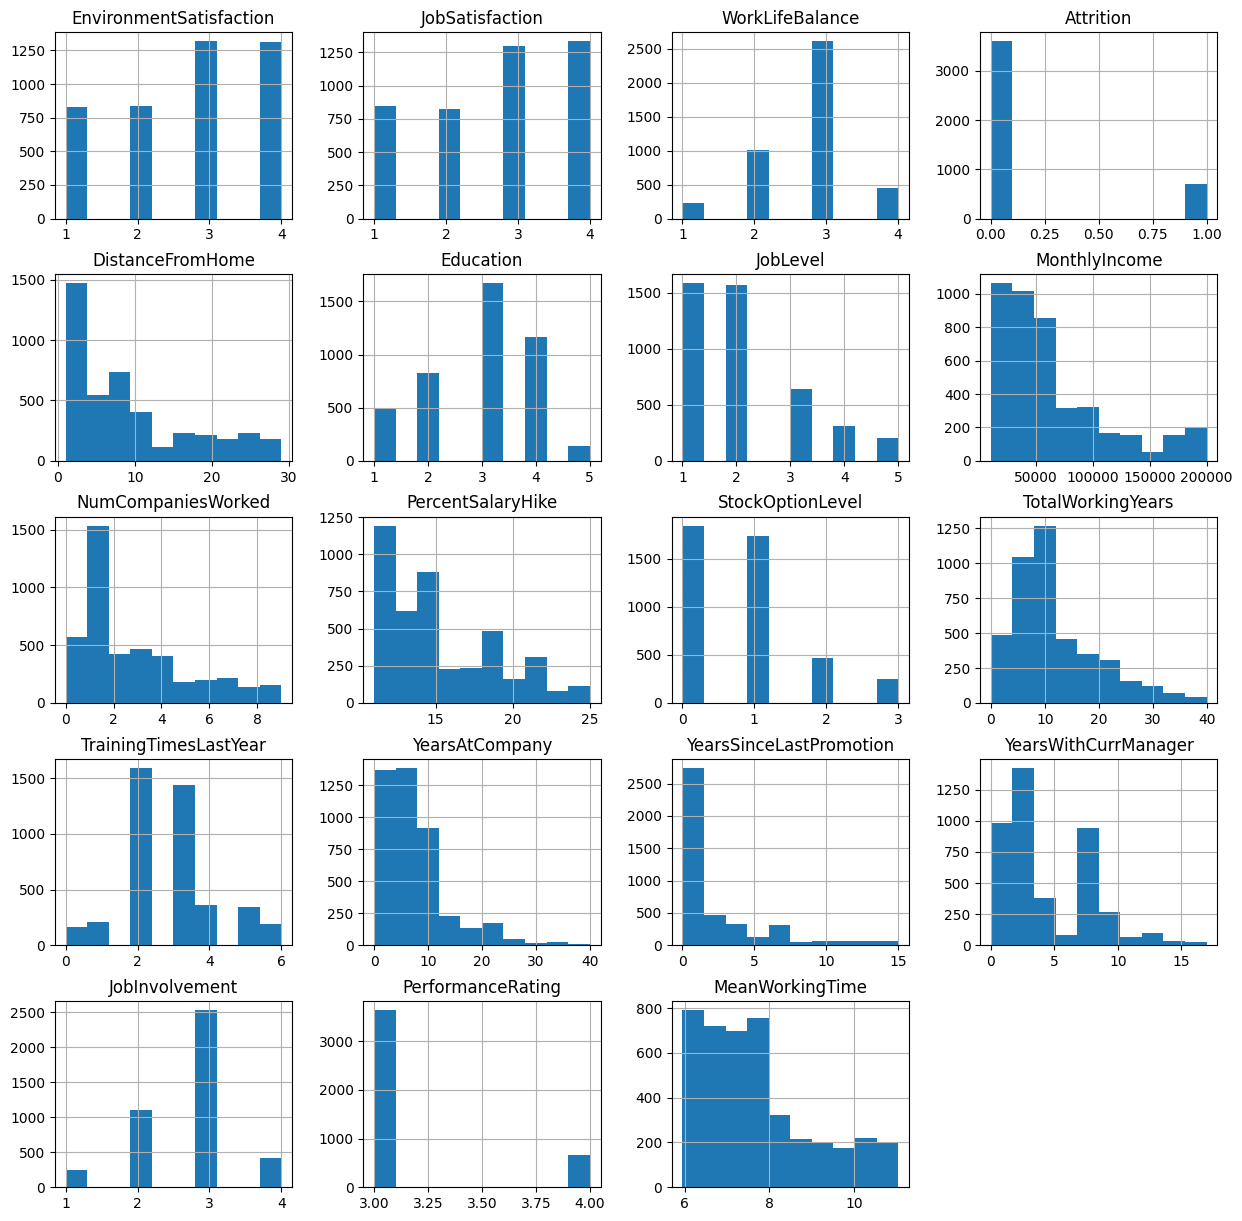

In [43]:
from matplotlib import pyplot as plt

data_stats.hist(figsize=(15,15))
plt.show()

(19.5, -0.5)

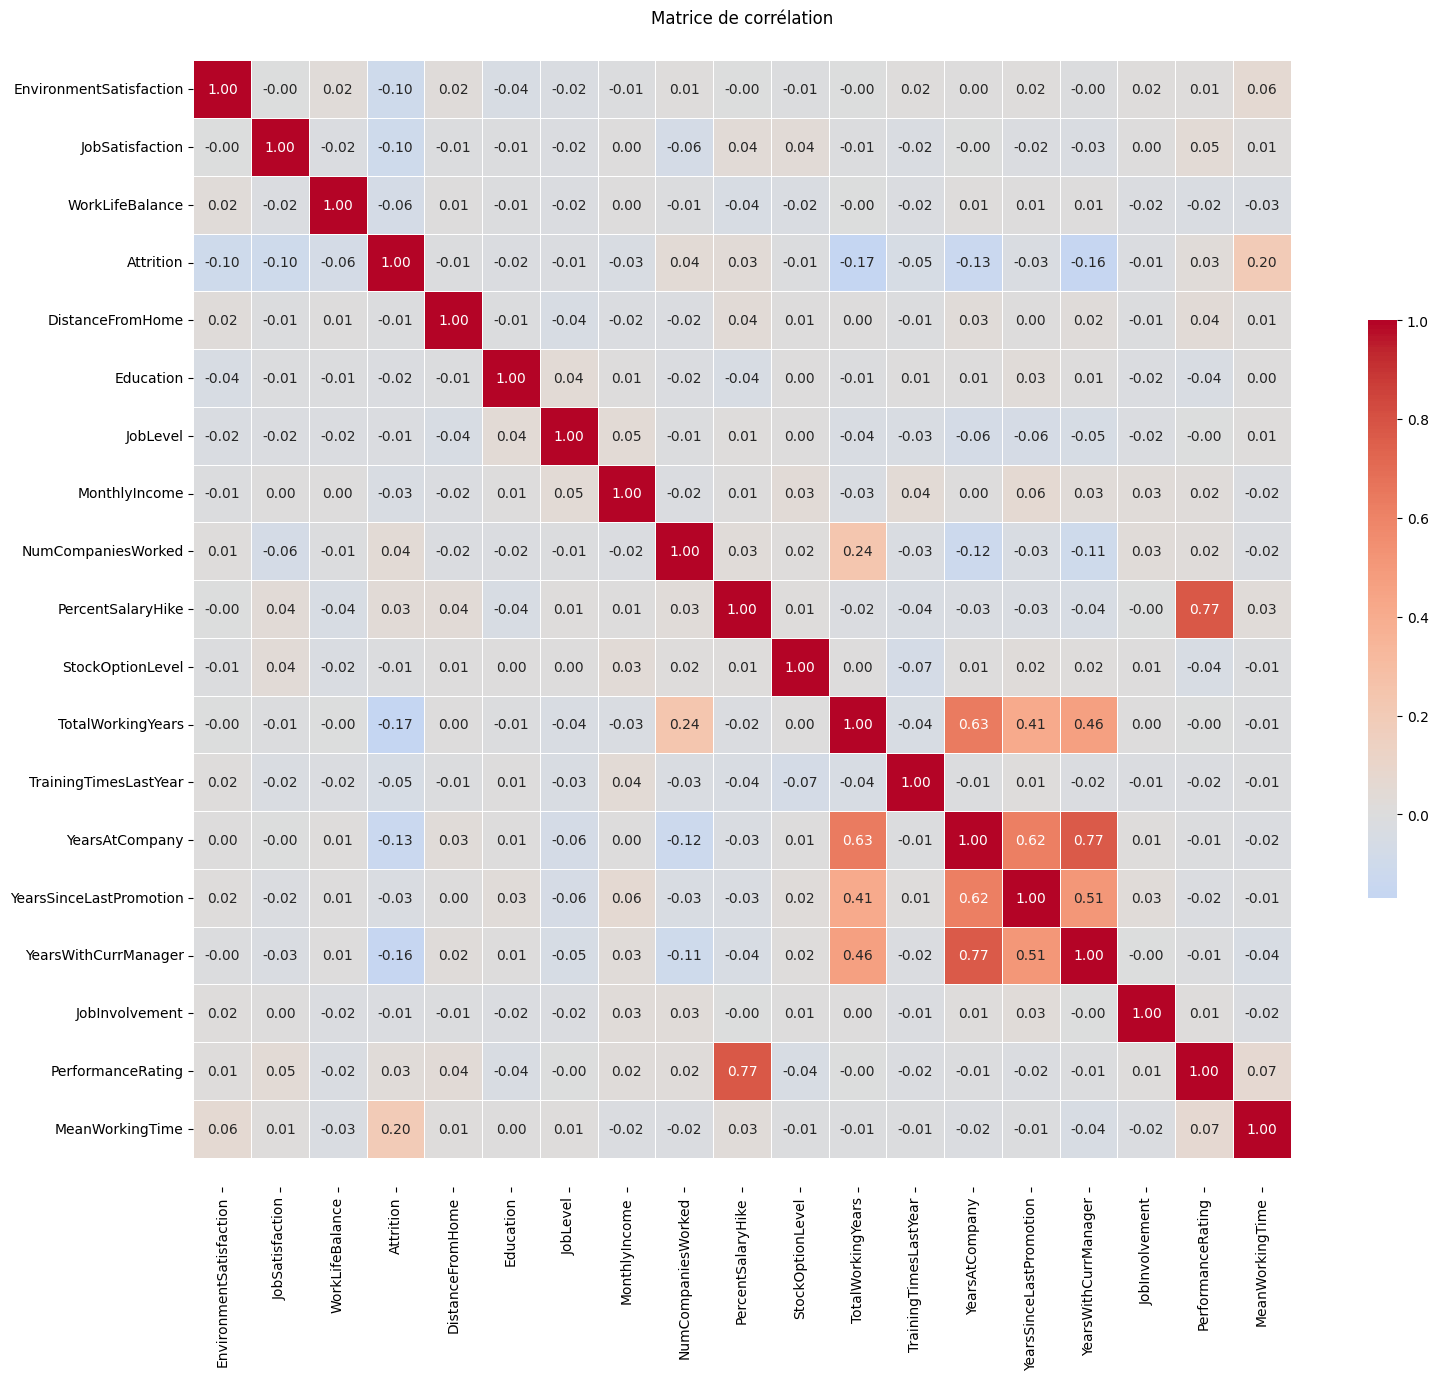

In [44]:
import seaborn as sns
# Calculer et afficher la matrice de corrélation des features
corr_matrix = data_stats.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm",  # Utiliser une colormap plus appropriée
            center=0,  # Définir le centre de la colormap
            square=True,  # Forcer la forme carrée
            cbar_kws={"shrink": .5},  # Réduire la taille de la colorbar
            ax=ax)
ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Split des données

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_merge, test_size=0.2)

In [29]:
X_train.shape

(3528, 24)

In [30]:
X_test.shape

(882, 24)

## Transformation des données avec un pipeline
Etapes :

A l'aide de la pipline nous supprimons les attributs de types string à l'aide d'un encodeur incrementale sur les champs :
- MaritalStatus
- JobRole
- BusinessTravel
- Department
- EducationField
- Male /female

Visualisation de la matrice des données.

In [32]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


X_Train = X_train.drop("Attrition", axis=1)
X_train_labels = X_train["Attrition"].copy()

 
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
    
 
data_num = X_Train.select_dtypes(include=[np.number])
 
num_attribs = list(data_num)
cat_attribs = ["MaritalStatus", "JobRole", "Department"]
cat_attribs_ordinal = ["BusinessTravel","EducationField"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ('cat_ordinal', OrdinalEncoder(), cat_attribs_ordinal)
    ])
 
X_prepared = full_pipeline.fit_transform(X_Train)


X_prepared

array([[ 1.17410684,  1.15035467,  0.33492507, ...,  0.        ,
         2.        ,  1.        ],
       [ 1.17410684,  0.23997978,  0.33492507, ...,  0.        ,
         2.        ,  3.        ],
       [ 0.2597031 ,  0.23997978,  1.75855836, ...,  0.        ,
         2.        ,  3.        ],
       ...,
       [-0.65470064,  0.23997978,  0.33492507, ...,  1.        ,
         2.        ,  2.        ],
       [-0.65470064, -0.67039512,  0.33492507, ...,  0.        ,
         2.        ,  1.        ],
       [-0.65470064,  0.23997978,  0.33492507, ...,  0.        ,
         2.        ,  1.        ]])

In [35]:
X_prepared.shape

(3528, 35)

In [23]:
X_Train.describe()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,MeanWorkingTime
count,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000,3440.000000
mean,2.725872,2.740116,2.761337,9.226163,2.905233,2.071221,64459.122093,2.655233,15.186628,0.786337,11.320640,2.805814,7.046221,2.202907,4.146512,2.731105,3.154360,7.711140
std,1.096466,1.100591,0.714381,8.151517,1.021876,1.109523,46770.768136,2.488888,3.655736,0.850219,7.839465,1.283610,6.186677,3.252859,3.579373,0.709728,0.361346,1.343318
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.962092
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,29040.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,6.683427
50%,3.000000,3.000000,3.000000,7.000000,3.000000,2.000000,48980.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,7.413827
75%,4.000000,4.000000,3.000000,14.000000,4.000000,3.000000,82010.000000,4.000000,18.000000,1.000000,15.000000,3.000000,10.000000,3.000000,7.000000,3.000000,3.000000,8.386221
max,4.000000,4.000000,4.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,11.030960
